# Projet : Deep Learning
*Par Arthur Couturier, Enzo Di Maria, José Colin, Rémi Bonrepaux & Yassir El Bsita*

<b> Classification d'images de fruits :</b> *apples, bananas, coconuts, grapes, lemons, limes, mangos, oranges, pineapples, tomatoes*.

<b>Lien vers la doc :</b> https://keras.io/api/

In [1]:
import sys
from random import randint
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

<b> Accès à la base de données ainsi qu'aux scripts </b>
1. <b>Version distante :</b> Vous utilisez Google Colab. Dans ce cas vous devrez cloner le dépôt GitHub en exécutant la portion (1) du code ci-dessous.
2. <b>Version locale :</b> Vous utilisez Visual Studio Code ou Jupyter Notebook. Dès lors, vous devrez simplement exécuter la portion (2) du code.

In [2]:
# Version distante (1)
#!git clone https://github.com/EnzoN7/Image-classification.git
#path = "./Image-classification/images/"
#sys.path.insert(1, "./Image-classification/scripts/")
#sys.path.insert(1, "./Image-classification/models/")

# Version locale (2)
path = "./images/"
sys.path.insert(1, "./scripts")
sys.path.insert(1, "./models")

# (1) et (2)
from LoadData import load_data
from Plots import plot_training_analysis, plot_random_images
from TestData import test_data
from BasicConvolutionalNetwork import BasicConvolutionalNetwork
from VGG16Network import VGG16Network
from InceptionV3Network import InceptionV3Network

<b> Stockage des fichiers au sein de tenseurs </b>

In [3]:
IMAGE_SIZE = 80
labels = ['apples', 'bananas', 'coconuts', 'grapes', 'lemons', 'limes', 'mangos', 'oranges', 'pineapples', 'tomatoes']

x_train, y_train = load_data(path, labels, _imagesize=IMAGE_SIZE)
x_val, y_val = load_data(path, labels, _dataset='validation', _imagesize=IMAGE_SIZE)
x_test, y_test = load_data(path, labels, _dataset='test', _imagesize=IMAGE_SIZE)

x_train.shape = (6710, 80, 80, 3)
y_train.shape = (6710, 1)


  0% (0 of 10) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
 10% (1 of 10) |##                       | Elapsed Time: 0:00:08 ETA:   0:01:16
 20% (2 of 10) |#####                    | Elapsed Time: 0:00:11 ETA:   0:00:23
 30% (3 of 10) |#######                  | Elapsed Time: 0:00:15 ETA:   0:00:27
 40% (4 of 10) |##########               | Elapsed Time: 0:00:19 ETA:   0:00:27
 50% (5 of 10) |############             | Elapsed Time: 0:00:23 ETA:   0:00:20
 60% (6 of 10) |###############          | Elapsed Time: 0:00:27 ETA:   0:00:15
 70% (7 of 10) |#################        | Elapsed Time: 0:00:32 ETA:   0:00:14
 80% (8 of 10) |####################     | Elapsed Time: 0:00:35 ETA:   0:00:05
 90% (9 of 10) |######################   | Elapsed Time: 0:00:44 ETA:   0:00:08
100% (10 of 10) |########################| Elapsed Time: 0:00:44 Time:  0:00:44


x_validation.shape = (1164, 80, 80, 3)
y_validation.shape = (1164, 1)


  0% (0 of 10) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
 10% (1 of 10) |##                       | Elapsed Time: 0:00:00 ETA:   0:00:04
 20% (2 of 10) |#####                    | Elapsed Time: 0:00:00 ETA:   0:00:02
 30% (3 of 10) |#######                  | Elapsed Time: 0:00:01 ETA:   0:00:04
 40% (4 of 10) |##########               | Elapsed Time: 0:00:02 ETA:   0:00:03
 50% (5 of 10) |############             | Elapsed Time: 0:00:02 ETA:   0:00:03
 60% (6 of 10) |###############          | Elapsed Time: 0:00:03 ETA:   0:00:02
 70% (7 of 10) |#################        | Elapsed Time: 0:00:04 ETA:   0:00:01
 80% (8 of 10) |####################     | Elapsed Time: 0:00:04 ETA:   0:00:01
 90% (9 of 10) |######################   | Elapsed Time: 0:00:04 ETA:   0:00:00
100% (10 of 10) |########################| Elapsed Time: 0:00:04 Time:  0:00:04


x_test.shape = (410, 80, 80, 3)
y_test.shape = (410, 1)


  0% (0 of 10) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
 10% (1 of 10) |##                       | Elapsed Time: 0:00:00 ETA:   0:00:04
 20% (2 of 10) |#####                    | Elapsed Time: 0:00:01 ETA:   0:00:04
 30% (3 of 10) |#######                  | Elapsed Time: 0:00:01 ETA:   0:00:04
 40% (4 of 10) |##########               | Elapsed Time: 0:00:02 ETA:   0:00:03
 50% (5 of 10) |############             | Elapsed Time: 0:00:02 ETA:   0:00:02
 60% (6 of 10) |###############          | Elapsed Time: 0:00:02 ETA:   0:00:01
 70% (7 of 10) |#################        | Elapsed Time: 0:00:03 ETA:   0:00:01
 80% (8 of 10) |####################     | Elapsed Time: 0:00:04 ETA:   0:00:00
 90% (9 of 10) |######################   | Elapsed Time: 0:00:04 ETA:   0:00:00
100% (10 of 10) |########################| Elapsed Time: 0:00:04 Time:  0:00:04


<b> Affichage d'une sélection d'images aléatoire pour vérifier que l'importation s'est bien déroulée </b>

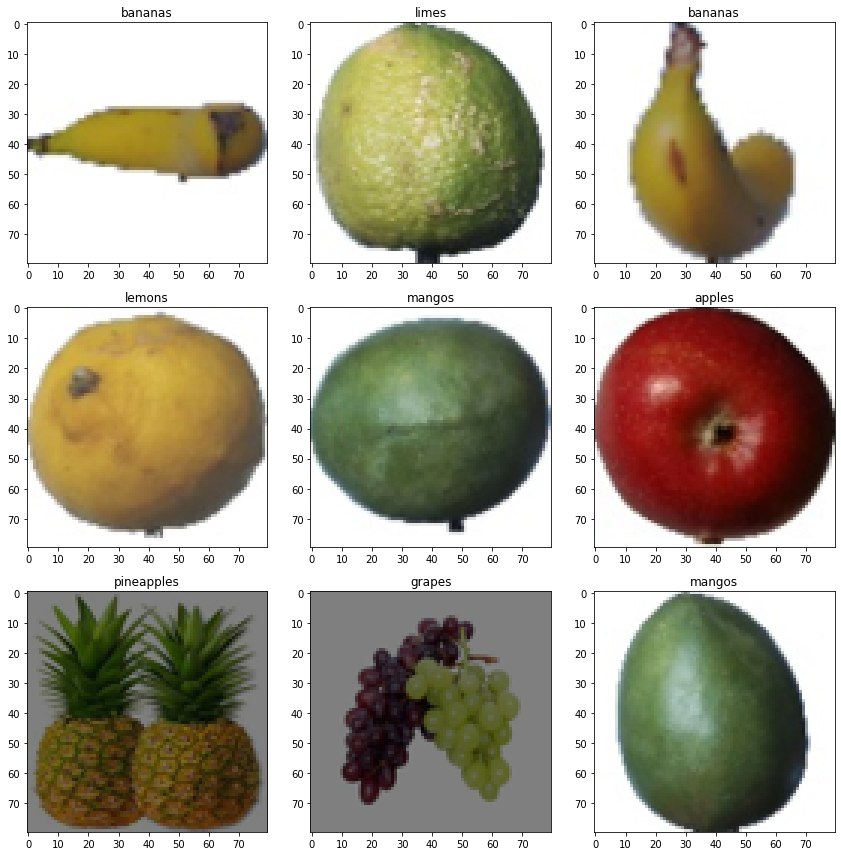

In [4]:
plot_random_images(x_train, y_train, labels)

<b>Lancement de l'entraînement</b>

In [5]:
METRICS = 'sparse_categorical_accuracy'

model = VGG16Network(len(labels), IMAGE_SIZE)

# Objet permettant d'augmenter davantage la taille de la base de données.
train_datagen = ImageDataGenerator(rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

model.build(input_shape=(None, IMAGE_SIZE, IMAGE_SIZE, 3))
model.summary()
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=1e-4),
              metrics=[METRICS])

train_generator = train_datagen.flow(x_train, y_train)
val_generator = train_datagen.flow(x_val, y_val)

history = model.fit(train_generator, 
                    validation_data=val_generator,
                    steps_per_epoch=train_generator.n // train_generator.batch_size,
                    validation_steps=val_generator.n // val_generator.batch_size,
                    epochs=20)

Model: "vgg16_network"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten (Flatten)           multiple                  0         
                                                                 
 dense (Dense)               multiple                  524544    
                                                                 
 dense_1 (Dense)             multiple                  2570      
                                                                 
Total params: 15,241,802
Trainable params: 527,114
Non-trainable params: 14,714,688
_________________________________________________________________
Epoch 1/20
209/209 [==============================] - 61s 288ms/step - loss: 1.5231 - sparse_categorical_accuracy: 0.5208 - val_loss: 1.0940 - val_sparse_categorical_a

<b>Analyse post-entraînement</b>
- <b>Prédiction de la classe</b> éventuelle d'une image test prise aléatoirement dans la base de donnée.
- Graphique montrant <b>l'évolution des métriques</b> au cours de l'entraînement sur les ensembles d'apprentissage et de validation.
- <b>Evalutation du modèle</b> dans sa globalité.

PREDICTIONS sur la donnée n°58/409
     apples -> 0.18%
     bananas -> 96.52%
     coconuts -> 0.02%
     grapes -> 0.23%
     lemons -> 0.40%
     limes -> 0.18%
     mangos -> 0.98%
     oranges -> 0.88%
     pineapples -> 0.05%
     tomatoes -> 0.56%

RESULTAT : bananas / 96.52%


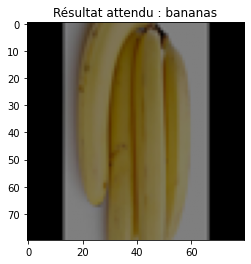

In [6]:
idx = randint(0, len(x_test) - 1)
test_data(model, labels, idx, x_test, y_test)

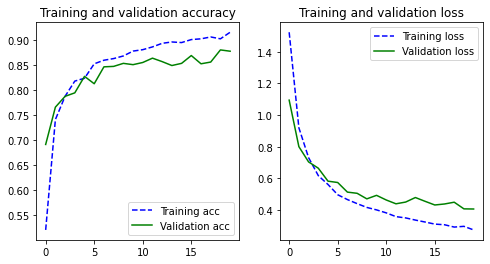

In [7]:
plot_training_analysis(history, METRICS)

In [8]:
print("EVALUATION DU MODELE " + model.name)
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=10)
print("Loss     : {0:.2f}%".format(loss_and_metrics[0] * 100))
print("Accuracy : {0:.2f}%".format(loss_and_metrics[1] * 100))

EVALUATION DU MODELE vgg16_network
41/41 [==============================] - 4s 95ms/step - loss: 1.3061 - sparse_categorical_accuracy: 0.6756
Loss     : 130.61%
Accuracy : 67.56%
